# Exploring Low Dimensional Manifolds with Flow Models

<img src="https://github.com/TimHenry1995/gyoza/blob/main/docs/images/Manifold%20Disentanglement%20Cartoon.png?raw=true" alt="drawing" width="800"/>

### Introduction
In this work, manifolds in the two dimensional plane are explored with flow models. The goal is to disentangle the factors underlying the shape of the manifolds. As the manifolds themselves are one-dimensional objects, there will be one factor for the position along the manifold and another factor for the deviation from that position in the form of noise. The model responsible for this disentanglement shall be flexible to capture complicated patterns in the point cloud. It shall also be invertible such that walking along the position factor in disentangled space can be translated back to walking along the manifold in the original space. The family of flow models is selected here.



### Approach
Throughout this interactive notebook, several case studies will be conducted to investigate the suitability of flow models for manifold disentanglement in the two dimensional plane. The case studies are constructed to test particular abilities of the model, including rotation, non-linear stretching and discontinuities. In every case study, data will be generated and a model will be calibrated. For the first case studies, simple models will be demonstrated while later case studies use more advanced models. The results are evaluated quantitatvely and discussed. Due to the interactive nature of this notebook, it is possible for the reader to  change experimental configurations and thus verify the observations made here. Readers who are unfamiliar with building flow models using gyoza are forwarded to the package [documentation](https://gyoza.readthedocs.io/en/latest/index.html) and [GitHub](https://github.com/TimHenry1995/gyoza) page where an introductory tutorial can be found.


### Model Requirements
The overall objective in each case study will be to develop an invertible model $T$ that maps an arbitrary point-cloud $Z \in \mathbb{R}^{M \times N}$ to a disentangled one $\tilde{Z} \in \mathbb{R}^{M \times N}$ with meaningful axes, where $M, N \in \mathbb{N}$ are the instance and dimension counts, respectively. For this purpose, it is necessary to define factors $k \in \{0,1,...,F\}$, for $F \in \mathbb{N}$ that capture an attribute of the point cloud, such as position along the manifold, or deviation away from it. A point $z \in \mathbb{R}^N$ in the cloud can thus be described by a corresponding model ouput $\tilde{z} \in \mathbb{R}^N$ that expresses its scores along these factors. By convention, the factor at index 0 is the residual factor capturing all unknown variation in the data (here deviation from the manifold) and is set to 0 for convenience. The factor at index 1 is here supervised as position $s \in \mathbb{R}$ along the manifold. The model learns from pairs of instances whose similarity along the factors has to be provided such that it can construct a mapping that preserves proximities. The below diagram illustrates the input and output provided by the current task.

![Image](https://github.com/TimHenry1995/gyoza/blob/develop/docs/images/Input%20and%20Output%20Diagram.png?raw=true)



### Model
The here chosen model uses several flow layers including reflection, permutation and coupling layers. The model starts with an activation normalization layer. For stability of processing, this layer is initialized such that its output has zero mean and unit standard deviation. During calibration, its location and scale parameters are adjusted to provide more optimal output. Processing continues through a sequence of stages (see below diagram), each of which has the same layers. The number of stages is a hyper-parameter that can be chosen small for simple case studies (e.g. the first study) and large for difficult case studies (e.g. studies 4 and 5).

A stage starts off with a reflection layer that produces a rotation of the input by means of two Householder reflections. This can help to align principal axes of variation in $z$ with the factor axes in $\tilde{z}$. Thereafter an additive coupling layer is used. This layer selects half of the dimensions of its input, transforms them in some non-linear way (here with a regular artificial neural network) and adds them to the other half of dimensions. This introduces non-linear transformations that allow to contract and expand space in different regions. It is followed by a permutation layer (here a Heaviside permutation) that swops dimensions. In a consecutive coupling layer the other half of dimensions is then coupled with the first. After another Heaviside permutation, all dimensions are coupled and placed at their original indices. A stage finishes with another activation normalization layer to ensure stability of the processing pipeline. For each layer, a detailed description can be found in the documentation of the flow network package [gyoza](https://gyoza.readthedocs.io/en/latest/).

![Image](https://github.com/TimHenry1995/gyoza/blob/develop/docs/images/Manifold%20Tutorial%20Model.png?raw=true)


### Notation
The below table collects all terms that carry special meaning here. Lowercase letters are used to denote indices (e.g. $n,m$), scalars (e.g. $s$) or vectors (e.g. $z, \tilde{z}$). Uppercase letters are used to denote totals (e.g. $N,M$) or collections of instances (e.g. $Z, \tilde{Z}, S$).

| Term | Definition |
| --- | --- |
| $M$ | $M \in \mathbb{N}, m \in \mathbb{N} < M$: The number of instances $M$ with index $m$ that are shown to the model $T$ for calibration and evaluation. |
| $F$ | $F \in \mathbb{N}, k \in \mathbb{N} < F$: The number of factors F with index $k$. By convention, $k=0$ is chosen as residual factor. Here, $k=1$ is chosen to represent the position along the manifold (see $s$). Here, $F$ is thus chosen to be $2$. |
| $S$ | $s \in \mathbb{R}, S \in \mathbb{R}^{M,1}$: An instance's position s along the manifold used to supervise the model $T$ to associate an input $z$ with an output $s$ along factor $k=1$. It is collected with positions of other instances in $S$. |
| $N$ | $N \in \mathbb{N}, n \in \{0,1,...,N-1\}$: The dimensionality of $z$ and $\tilde{z}$, here chosen to be $2$. |
| $N_k$ | $N_k \in \mathbb{N} < N$: The dimensionality of a factor, such that $ \sum_{k=0}^{K-1} N_{k} = N$. Here, the residual factor $k=0$ as well as the manifold position factor $k=1$ have dimensionality 1.
| $Z$ | $z \in \mathbb{R}^N, Z \in \mathbb{R}^{M \times N}$: An instance $z$ of the input space, collected with other instances in point cloud $Z$. |
| $Y$ | $y \in \mathbb{R}^F, Y \in \mathbb{R}^{M \times F} $: The target for each factor, i.e. class labels in the categorical case or scores in the continuous case as used here (see $s$). |
| $T$ | $\tilde{z} = T(z), z = T^{-1}(\tilde{z}) \in \mathbb{R}^{N} \mapsto \mathbb{R}^{N}$: A transformation $T$ (and its inverse $T^{-1}$) that disentangles $Z$ into $F$ factors, each having their dimensionality $N_{k}$ |
| $\tilde{Z}$ | $\tilde{z} \in \mathbb{R}^N, \tilde{z}_k \in \mathbb{R}^{N_k}, \tilde{Z} \in \mathbb{R}^{M \times N}$: The disentangled representation of point cloud $Z$ with factor $k=0$ along the first dimension of $N$ and $k=1$ along the second dimension of N. |
| $Z_{ab}$ | $z_{ab} \in \mathbb{R}^{2 \times N}, Z_{ab} \in \mathbb{R}^{M \times 2 \times N}$: A pair of instances $z$, called z_{ab}, where the axis with $2$ entries is the pair axis. It is collected along with other pairs in $Z_{ab}$ and provided to model $T$ during calibration. |
| $Y_{ab}$ | $y_{ab} \in [0,1]^{F}, Y_{ab} \in \mathbb{R}^{M \times F}$: The similarity of a pair of instances (see $z_{ab}$) provided in the range from 0 to 1 (inclusive) for each factor used to supervise model $T$ during calibration.. It is collected along with other similarities in $Y_{ab}$. |

## Preparations

In order to run the experiments, several code snippets have to be executed. These include installation and importing of libraries and the definition of custom functions for data synthesis, modelling and plotting. It is recommended to execute these cells and then collapse the entire preparations section and focus on the next section which contains the first case study.

### Package Management

In [ ]:
!pip install gyoza

In [ ]:
!pip install ipywidgets

In [ ]:
# Import modules
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf, random, os, matplotlib.pyplot as plt, numpy as np
from gyoza.modelling import flow_layers as mfl, masks as gmm, standard_layers as msl, data_iterators as mdis
from gyoza.utilities import math as gum
from typing import List, Callable, Tuple
from ipywidgets import interact, fixed
tf.keras.backend.set_floatx('float64')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

### Data Synthesis

In [ ]:
# For reproducability
def reset_random_number_generators(seed: int):
    """This function resets the random number generators of python, numpy and tensorflow.

    :param seed: The new seed that shall be provided to each random number generator.
    :type seed: int
    """
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

def create_data_set(S: np.array, manifold_function: Callable, noise_strength: float) -> Tuple[np.array, np.array]:
    """Creates a data set by passing the position ``S`` along the manifold through the ``manifold_function`` and adding Gaussian noise to
    each dimension. That noise is centered at zero and has standard devitation ``noise_strength``.

    :param S: The position along the manifold. Shape == [:math:`M`, 1], where :math:`M` is the number of instances
    :type S: np.array
    :param manifold_function: A function that maps from ``S`` to coordinates on the manifold in the real two dimensional plane.
    :type manifold_function: :class:`Callable`
    :param noise_strength: Standard deviation of the noise.
    :type noise_strength: float
    :return:
        - Z (:class:`numpy.ndarray`) - The collection of points around the manifold. Shape == [:math:`M`, :math:`N`], where :math:`M` is the
            instance count and :math:`N` the dimensionality.
        - Y (:class:`numpy.ndarray`) - The target for factorization. Here, it is 0 for the residual factor (index 0) and S for the position factor
            (index 1). Shape == [:math:`M`, :math:`F`], where :math:`M` is the instance count and :math:`F=2` the factor count.
    """

    # Add noise
    data_function = lambda x: add_noise(*manifold_function(x), noise_strength=noise_strength)

    # Generate data
    Y = np.concatenate([np.zeros([len(S),1]), S[:, np.newaxis]], axis=1) # Dimension at index 0 is residual factor, at index 1 is position along manifold
    Z_1, Z_2 = data_function(S) # Map line s onto manifold in 2D plane
    Z = np.concatenate([Z_1[:,np.newaxis], Z_2[:,np.newaxis]], axis=1)

    # Outputs
    return Z, Y


# Adds noise to data points on the manifold
add_noise = lambda x_1, x_2, noise_strength: (x_1 + noise_strength * np.random.normal(scale=noise_strength, size=x_1.shape), x_2 + noise_strength * np.random.standard_normal(size=x_2.shape))

# Generate equally spaced points along a line
M = 1024; N = 2
golden_ratio = (1 + 5 ** 0.5) / 2
beta = np.log(golden_ratio)/(np.pi/2) # https://en.wikipedia.org/wiki/Golden_spiral see section on mathematics
s_max = (1*np.sqrt(1+beta**2)/beta)*(np.exp(beta*2*np.pi)-1)/2 # https://www.quora.com/What-is-the-arc-length-of-the-logarithmic-spiral-from-t0-to-t the arc length of the golden spiral for one full rotation
S = np.linspace(-s_max,s_max,M, dtype=tf.keras.backend.floatx()) # These points are the steps along any manifold
S_star = np.linspace(np.min(S), np.max(S), 100) # Take a small set of points to plot manifold efficiently

# This function computes the similarity Y_ab
similarity_function = lambda Y_a, Y_b: np.concatenate([np.zeros([Y_a.shape[0],1]), 1 - np.abs(Y_a[:,1:2]-Y_b[:,1:2])/ (np.abs(np.max(S)-np.min(S)))], axis=1);

### Modelling

In [ ]:
def create_network(Z_sample: np.ndarray, stage_count: int, sigma: float = 1.0) -> mfl.SupervisedFactorNetwork:
    """This function creates a supervised factor network that has starts with an activation normalization layer and then has ``stage_count`` many
    consecutive processing stages. Each stage consists of a reflection layer, followed by an full coupling layer (two additive coupling layers, each
    followed by a Heaviside permutation, one with nagative) and an activation normalization layer. During inference, the network takes input :math:`Z`
    and outputs :math:'\tilde{Z}' which each have shape [:math:`M`, :math:`N`], where :math:`M` is the instance count and :math:`N=2` is the
    dimensionality.

    :param Z_sample: A representative sample of the data to be fed through the model. This is needed to initialize some layer parameters. Shape
        is assumed to be [sample size, :math:`N`], where :math:`N=2` is the dimensionality of an instance.
    :type Z_sample: :class:`numpy.ndarray`
    :param stage_count: The number of processing stages that the ``network`` shall use.
    :type stage_count: int
    :param sigma: The association strength of maximally similar data points. It should be in the range (0,1].
    :type sigma: float, default = 1
    :return: network (:class:`SupervisedFactorNetwork`) - The network.
    """

    # Set up the coupling functions and masks for the coupling layers
    dimensionality = 2
    layers = [None] * (1+6*stage_count)
    layers[0] = mfl.ActivationNormalization(axes=[1], shape=[dimensionality])
    for i in range(stage_count):
        layers[6*i+1] = mfl.Reflection(axes=[1], shape=[dimensionality], reflection_count=2)

        compute_coupling_parameters_1 = msl.BasicFullyConnectedNet(latent_dimension_count=4*dimensionality, output_dimension_count=dimensionality, depth=3)
        mask_1 = gmm.CheckerBoard(axes=[1], shape=[dimensionality])

        layers[6*i+2] = mfl.AdditiveCoupling(axes=[1], shape=[dimensionality], compute_coupling_parameters=compute_coupling_parameters_1, mask=mask_1)
        layers[6*i+3] = mfl.Heaviside(axes=[1], shape=[dimensionality])

        compute_coupling_parameters_2 = msl.BasicFullyConnectedNet(latent_dimension_count=4*dimensionality, output_dimension_count=dimensionality, depth=3)
        mask_2 = gmm.CheckerBoard(axes=[1], shape=[dimensionality])

        layers[6*i+4] = mfl.AdditiveCoupling(axes=[1], shape=[dimensionality], compute_coupling_parameters=compute_coupling_parameters_2, mask=mask_2)
        layers[6*i+5] = mfl.Heaviside(axes=[1], shape=[dimensionality])

        layers[6*i+6] = mfl.ActivationNormalization(axes=[1], shape=[dimensionality])

    # Construct the network
    network = mfl.SupervisedFactorNetwork(sequence=layers, dimensions_per_factor=[1,1], sigma=sigma) # One dimension for the residual factor (index 0) and one for the manifold proximity (index 1)
    network(Z_sample) # Initialization of some layer parameters

    # Outputs
    return network

def cross_validate(Z: np.ndarray, Y: np.ndarray, networks: List[mfl.SupervisedFactorNetwork], batch_size: int, epoch_count: int, similarity_function: Callable, manifold_name: str, plot_losses: bool = False) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """Performs cross-validation on the provided networks. It first shuffles the data ``Z`` and ``Y``, then partitions it into fold-count many
    equally sized subsets and then calibrates each network on the data set-minus one subset of the partition. The held out subsets are returned
    for model evaluationl. The fold-count is inferred from the length of ``network``. This implementation assumes that the networks are
    :class:`SupervisedFactorNetworks` that are calibrated using the :py:func:`volatile_factorized_pair_iterator`.

    :param Z: The input to the networks (when in inference mode) of shape [:math:`M`,:math:`N`], where :math:`M` is the total instance count and
        :math:`N` the dimensionality.
    :type Z: :class:`numpy.ndarray`
    :param Y: The factorized targets per instance of shape [:math:`M`. :math:`F`], where :math:`M` is the total instance count and :math:`F` is
        the factor count.
    :type Y: :class:`numpy.ndarray`
    :param networks: The networks to be calibrated. They are assumed to be compiled with an optimizer.
    :type networks: List[:class:`SupervisedFactorNetwork`]
    :param batch_size: The size of batches used during calibration.
    :type batch_size: int
    :param epoch_count: The number of times the iterator shall cycle through the data during calibration of each network.
    :type epoch_count: int
    :param similarity_function: A function that takes maps from Y_a (shape == [:math:`M`,:math:`F`]), Y_b (shape == [:math:`M`,:math:`F`]) to
        [:math:`M`,:math:`F`] to indicate the similarity of an instance a to an instance b along each factor. :math:`M` is the number of instances
        and :math:`F` the number of factors.
    :type similarity_function: Callable
    :param manifold_name: The name of the manifold on which the networks are fitted. Used for the title of the plot.
    :type manifold_name: str
    :param plot_losses: Indicates whether the loss per epoch shall be plotted for each network.
    :type plot_losses: bool, default False

    :return:
        - Z_test (List[:class:`numpy.ndarray`]) - The test subsets for the model input, one for each instance in ``networks``, having
            shape [:math:`M^*`,:math:`N`], where :math:`M^*` is the test set size equal to the total instance count in ``Z`` divided by the
            number of instances in ``networks`` and :math:`N` is the dimensionality.
        - Y_test (List[:class:`numpy.ndarray`]) - The test subsets for the models factor targets, one for each instance in ``networks``, having
            shape [:math:`M^*`,:math:`F`], where :math:`M^*` is the test set size equal to the total instance count in ``Z`` divided by the
            number of instances in ``networks`` and :math:`F` is the number of factors.
    """

    # Shuffle indices
    M = Z.shape[0]
    indices = list(range(M)); random.shuffle(indices)

    # Prepare figure
    fold_count = len(networks)

    # Cross validate
    Z_test = [None] * fold_count; Y_test = [None] * fold_count
    fold_size = M // fold_count
    iterators = [None] * fold_count
    for k in range(fold_count):

        # Calibrate
        train_indices = indices[:k*fold_size] + indices[(k+1)*fold_size:]
        M = len(train_indices)
        iterator = mdis.volatile_factorized_pair_iterator(X=Z[train_indices,:], Y=Y[train_indices,:], batch_size=batch_size, similarity_function=similarity_function)
        epoch_loss_means, epoch_loss_standard_deviations = networks[k].fit(iterator=iterator, epoch_count=epoch_count, batch_count=M//batch_size)

        if plot_losses: plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

        # Save test indices
        test_indices = indices[k*fold_size:(k+1)*fold_size]
        Z_test[k] = Z[test_indices,:]; Y_test[k] = Y[test_indices,:]

    # Outputs
    return Z_test, Y_test

### Plotting

In [ ]:
def plot_instance_pairs(S: np.ndarray, Z_ab: np.ndarray, Y_ab: np.ndarray, manifold_function: Callable, manifold_name: str):
    """Plots pairs of instances along with their similarities and the manifold (without noise).

    :param S: The position along the manifold. Shape == [:math:`M`, 1], where :math:`M` is the number of instances.
    :type S: np.array
    :param Z_ab: The coordinates of the instances to be plotted. Shape is assumed to be [:math:`M`, 2, :math:`N`], where :math:`M` is the number
        of instances, the 2 at axis 1 enumerates the two instances of the pair and :math:`N = 2` is the dimensionality of an instance.
    :type Z_ab: :class:`numpy.ndarray`
    :param Y_ab: The similarities of the ``Z_ab`` instances. Shape is assumed to be [:math:`M`, :math:`F`], where :math:`M` is the number of
        instances and :math:`F=2` at axis 1 is the factor count.
    :type Y_ab: :class:`numpy.ndarray`
    :param manifold_function: A function that takes as input the position ``S`` along the manifold and provides as output the two coordinates
        that are associated with that position along the manifold. Hence, [:math:`M`,1] -> [:math:`M`, :math:`N`], where M is the number of
        instances and :math:`N=2` their dimensionality
    :type manifold_function: Callable
    :param manifold_name: A name assigned to the manifold that is used as a label in the plot.
    :type manifold_name: str
    """

    # Construct figure
    plt.figure(figsize=(3.5,3.5)); plt.title(rf"Instance Pairs And Similarities on ${manifold_name}$")

    # Plot instance pairs
    plt.scatter(Z_ab[:,0,0], Z_ab[:,0,1]) # Instances a
    plt.scatter(Z_ab[:,1,0], Z_ab[:,1,1]) # Instances b

    # Plot manifold
    plt.scatter(*manifold_function(S), color='gray', marker='.', s=1)

    # Label current plots
    plt.legend(['z_a','z_b'])

    # Plot lines that connect the two instances of a pair
    s_max = np.max(S)
    for i in range(Z_ab.shape[0]): # Iterate instances
        plt.plot([Z_ab[i,0,0], Z_ab[i,1,0]], [Z_ab[i,0,1], Z_ab[i,1,1]], '--', color='black')
        plt.text(Z_ab[i,1,0]+0.5, Z_ab[i,1,1], 's = ' + str(np.round(Y_ab[i,1], 2))) # Label for their similarity
    plt.ylim(-s_max/0.8,s_max/0.8); plt.xlim(-s_max/0.8,s_max/0.8)

    plt.xlabel('First Dimension'); plt.ylabel('Second Dimension')
    plt.show()

def plot_loss_trajectory(epoch_loss_means: List[float], epoch_loss_standard_deviations: List[float], manifold_name: str):
    """Plots the loss trajectory after model calibration with error surface.

    :param epoch_loss_means: The mean across batches for each epoch. Length = [epoch count]
    :type epoch_loss_means: List[float]
    :param epoch_loss_standard_deviations:  The standard deviation across batches for each epoch. Length = [epoch count]
    :type epoch_loss_standard_deviations: List[float]
    :param manifold_name: The name of the manifold on which the model was calibrated. Used for the title.
    :type manifold_name: str
    """

    # Preprocess
    M = len(epoch_loss_means)
    means = np.array(epoch_loss_means)
    errors = 2.0 * np.array(epoch_loss_standard_deviations) / np.sqrt(M)

    # Create figure
    plt.figure(figsize=[12,3]); plt.title(rf'Loss Trajectory on Manifold ${manifold_name}$')

    # Error surface
    plt.fill_between(x=list(range(M)), y1=means-errors, y2=means+errors, color='mistyrose')

    # Line
    plt.plot(epoch_loss_means)

    # Labels
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend([r'$\pm 2*$ Standard Error', 'Mean Across Batches'])

def plot_input_output(network: mfl.SupervisedFactorNetwork, S_range: Tuple[float,float], manifold_function: Callable, noise_strength: float, manifold_name: str):
    """Plots the input and output to the ``network``. Points are colored using a color wheel. Supplementary marginal distribution are provided.

    :param network: The network that shall process the data. It is expected to map from [:math:`M`,:math:`N`] to [:math:`M`,:math:`N`], where
        :math:`M` is the instance count and :math:`N=2` the dimensionality.
    :type network: mfl.SupervisedFactorNetwork
    :param S_range: The range of position along the manifold. The first entry is assumed to be the minimum while the second entry is assumed to
        be the maximum.
    :type S_range: Tuple[float,float]
    :param manifold_function: A function that maps from position on manifold (:math:`S`, shape == [instane count M]) to coordinates in :math:`N=2`
        dimensional space.
    :type manifold_function: Callable
    :param noise_strength: Standard deviation of the noise that shall be added to the data before passing it through the model.
    :type noise_strength: float
    :param manifold_name: The name of the manifold used in the title.
    :type manifold_name: str
    """

    # Sample from manifold to illustrate distortion of data
    S = np.linspace(S_range[0], S_range[1], len(gum.color_palette)) # Each point will receive its own color
    x_1, x_2 = add_noise(*manifold_function(S), noise_strength=noise_strength)

    # Create gridlines to illustrate distortion of surrounding space
    points_per_line = 10
    min_x_1 = np.min(x_1); max_x_1 = np.max(x_1); mean_x_1 = np.abs(np.mean(x_1)) # Horizontal ticks
    min_x_2 = np.min(x_2); max_x_2 = np.max(x_2); mean_x_2 = np.abs(np.mean(x_2)) # Vertical ticks

    if (np.abs(max_x_1 - min_x_1) < np.abs(max_x_2 - min_x_2)): # Ensures lines are large enough to encompass data and square
        x_2_grid = np.linspace(min_x_2 - np.abs(mean_x_2 - min_x_2), max_x_2 + np.abs(mean_x_2-max_x_2), points_per_line)
        h_x_1, h_x_2 = np.meshgrid(x_2_grid, x_2_grid) # horizontal line coordinates
        v_x_2, v_x_1 = np.meshgrid(x_2_grid, x_2_grid) # vertical line coordinates
    else:
        x_1_grid = np.linspace(min_x_1 - np.abs(mean_x_1-min_x_1), max_x_1 + np.abs(mean_x_1-max_x_1), points_per_line)
        h_x_1, h_x_2 = np.meshgrid(x_1_grid, x_1_grid) # horizontal line coordinates
        v_x_2, v_x_1 = np.meshgrid(x_1_grid, x_1_grid) # vertical line coordinates

    # Plot
    fig, axs = plt.subplots(2,4,figsize=(9,4.5), gridspec_kw={'height_ratios': [4, 0.5], 'width_ratios':[0.5,4,0.5,4]})

    # 1. Plot joint distributions
    # 1.1 Z
    plt.suptitle(rf"Inference on ${manifold_name}$")
    plt.subplot(2,4,2); plt.title("Input")

    # 1.1.1 Gridlines
    for l in range(points_per_line): plt.plot(h_x_1[l,:], h_x_2[l,:], color='#C5C9C7', linewidth=0.75)
    for l in range(points_per_line): plt.plot(v_x_1[l,:], v_x_2[l,:], color='#C5C9C7', linewidth=0.75)

    # 1.1.2 Data
    Z = np.concatenate([x_1[:,np.newaxis], x_2[:, np.newaxis]], axis=1)
    plt.scatter(Z[:,0], Z[:,1], c=gum.color_palette/255.0, zorder=3); plt.xlabel("First Dimension"); plt.ylabel("Second Dimension")
    Z_x_lim = plt.gca().get_xlim(); Z_y_lim = plt.gca().get_ylim() # Use these for marginal distributions

    # 1.2 Z tilde
    plt.subplot(2,4,4); plt.title("Output")
    Z_tilde = network(Z)
    H_Z_tilde = network(tf.concat([np.reshape(h_x_1, [-1])[:,np.newaxis], np.reshape(h_x_2, [-1])[:,np.newaxis]], axis=1))
    V_Z_tilde = network(tf.concat([np.reshape(v_x_1, [-1])[:,np.newaxis], np.reshape(v_x_2, [-1])[:,np.newaxis]], axis=1))

    # 1.2.1 Gridlines
    for l in range(points_per_line): plt.plot(H_Z_tilde[l*points_per_line:(l+1)*points_per_line,0], H_Z_tilde[l*points_per_line:(l+1)*points_per_line,1], color='#C5C9C7', linewidth=0.75)
    for l in range(points_per_line): plt.plot(V_Z_tilde[l*points_per_line:(l+1)*points_per_line,0], V_Z_tilde[l*points_per_line:(l+1)*points_per_line,1], color='#C5C9C7', linewidth=0.75)

    # 1.2.2 Data
    plt.scatter(Z_tilde[:,0], Z_tilde[:,1], c=gum.color_palette/255.0, zorder=3); plt.xlabel('Residual Factor'); plt.ylabel('Manifold Position Factor')
    Z_tilde_min = np.min(Z_tilde, axis=0); Z_tilde_max = np.max(Z_tilde, axis=0); Z_tilde_mean = np.mean(Z_tilde, axis=0)
    Z_tilde_x_lim = (Z_tilde_min[0] - np.abs(Z_tilde_mean[0] - Z_tilde_min[0]), Z_tilde_max[0] + np.abs(Z_tilde_mean[0] - Z_tilde_max[0]));
    Z_tilde_y_lim = (Z_tilde_min[1] - np.abs(Z_tilde_mean[1] - Z_tilde_min[1]), Z_tilde_max[1] + np.abs(Z_tilde_mean[1] - Z_tilde_max[1]));
    plt.xlim(*Z_tilde_x_lim); plt.ylim(*Z_tilde_y_lim)

    # 2. Plot marginal distributions
    # 2.1 Z
    plt.subplot(2,4,6)
    plt.hist(Z[:,0], histtype='step'); plt.xlim(Z_x_lim); plt.gca().invert_yaxis(); plt.axis('off')
    plt.subplot(2,4,1)
    plt.hist(Z[:,1], orientation='horizontal', histtype='step'); plt.ylim(Z_y_lim); plt.gca().invert_xaxis(); plt.axis('off')

    # 2.2 Z tilde
    plt.subplot(2,4,8)
    plt.hist(Z_tilde[:,0], histtype='step'); plt.gca().invert_yaxis(); plt.xlim(Z_tilde_x_lim); plt.axis('off')
    plt.subplot(2,4,3)
    plt.hist(Z_tilde[:,1], orientation='horizontal', histtype='step'); plt.ylim(Z_tilde_y_lim); plt.gca().invert_xaxis(); plt.axis('off')

    # Make other subplots invisible
    plt.subplot(2,4,5); plt.axis('off')
    plt.subplot(2,4,7); plt.axis('off')

    plt.tight_layout()
    plt.show()

def evaluate_and_plot_networks(Z_test: List[np.ndarray], Y_test: List[np.ndarray], networks: List[mfl.SupervisedFactorNetwork], manifold_name: str):
    """For each network, a scatter plot for the predicted and actual position along the manifold is plotted along with a bar for the proportion
    of explained variance.

    :param Z_test: A list of test sets used as input to the corresponding network in ``networks``. The list is expected to have the same length
        as ``networks`` and each test set is assumed to have shape [:math:`M^*`,:math:`N`], where :math:`M^*` is the number of instances in a
        test set and :math:`N=2` is the dimensinoality of an instance.
    :type Z_test: List[np.ndarray]
    :param Y_test: A list of test sets used to evaluate to the corresponding network in ``netwroks``. The list is expected to have the same length
        as ``networks`` and each test set is assumed to have shape [:math:`M^*`,:math:`F`], where :math:`M^*` is the number of instances in a
        test set and :math:`F=2` is the number of factors. It is assumed that factor at index 1 encodes the position along the manifold.
    :type Y_test: List[np.ndarray]
    :param networks: A list of calibrated networks that take ``Z_test`` as input and whose output (of same shape as input) encodes position along
        the data manifold along index 2.
    :type networks: List[mfl.SupervisedFactorNetwork]
    :param manifold_name: The name of the manifold used in the figure title.
    :type manifold_name: str
    """

    # Prepare figure
    fold_count = len(networks)
    fig, axs = plt.subplots(1,3*fold_count,figsize=(12,2), gridspec_kw={'width_ratios': [6, 1, 1]*fold_count})
    plt.suptitle(rf"{fold_count}-Fold Cross Validated Evaluation on ${manifold_name}$")

    # Iterate networks
    for n, network in enumerate(networks):
        # 1. Predict
        Y_hat = network(Z_test[n]).numpy()
        Y = Y_test[n]

        # 2. Create scatter plot for manifold position
        plt.subplot(1,3*fold_count, 3*n+1);
        plt.scatter(Y_hat[:,1], Y[:,1], color='black', marker='.', s=1);
        ax = plt.gca();ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

        if n == 0:
            plt.ylabel("Manifold Position\n\nActual"); plt.xlabel("Predicted")
        else:
            plt.yticks([]); plt.xlabel(f'Fold {n+1}')

        # 3. Create bar plot for proportion of explained variance for position along manifold (factor at position 1)
        r2 = np.corrcoef(Y[:,1], Y_hat[:,1])[1,0]**2 # Since the output is a correlation matrix, the [1,0] selects the correlation between the two variables

        plt.subplot(1,3*fold_count, 3*n+2);
        plt.bar([0], [r2], color='white', edgecolor='black'); plt.ylim([0,1]); plt.xlim([-1,1]); plt.xticks([])#[n+1], [f"Fold {n+1}"])
        if n==0:
            ax = plt.gca();ax.spines['top'].set_visible(False); ax.spines['left'].set_visible(False); ax.spines['right'].set_visible(False)
            plt.ylabel(r'$r^2$');  plt.gca().yaxis.tick_right();  plt.yticks([0,1])
        else:plt.axis('off')

        t=plt.text(-0,r2/2,f'{np.round(r2,2)}', horizontalalignment='center'); t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='white'))

        # Padding on right of each bar plot
        plt.subplot(1,3*fold_count, 3*n+3); plt.axis('off')

    plt.show()

def plot_inverse_point(position: float, residual: float, S: np.ndarray, network: mfl.SupervisedFactorNetwork, manifold_function: Callable, manifold_name: str):
    """This function visualizes the ``network``'s inversion ability by plotting the inverse of the point[``residual``, ``position``]. It also
    plots the ``manifold_function`` on input ``S`` for reference.

    :param position: The position along the manifold that shall be entered for dimensions at index 1 for inversion via the ``network``.
    :type position: float
    :param residual: The residual that shall be entered for dimensions at index 0 for inversion via the ``network``.
    :type residual: float
    :param S: Points along which the ``manifold_function`` shall be evaluated during plotting.
    :type S: :class:`numpy.ndarray`
    :param network: A network calibrated to disentangle manifold position (factor at dimension 1) from deviation from manifold (factor at
        dimension 0). It shall map from [:math:`M`,:math:`N`] to [:math:`M`,:math:`N`], where :math:`M` is the instance count and :math:`N=2`
        is the dimensionality.
    :type network: mfl.SupervisedFactorNetwork
    :param manifold_function: A function that maps from position on manifold (:math:`S`, shape == [instane count M]) to coordinates in :math:`N=2`
        dimensional space.
    :type manifold_function: _type_
    :param manifold_name: The name of the manifold used for the figure title.
    :type manifold_name: str
    """

    # Construct figure
    plt.figure(figsize=(3.5,3.5)); plt.title(rf"Inverse Modelling on ${manifold_name}$")

    # Predict position using network
    Z_tilde = np.array([[residual,position]], dtype=tf.keras.backend.floatx())
    Z = network.invert(Z_tilde)
    plt.scatter(Z[:,0], Z[:,1])

    # Plot manifold
    plt.scatter(*manifold_function(S), color='gray', marker='.', s=1)

    # Axes and labels
    s_max = np.max(S)
    plt.ylim(-s_max/0.8,s_max/0.8); plt.xlim(-s_max/0.8,s_max/0.8)
    plt.xlabel('First Dimension'); plt.ylabel('Second Dimension')
    plt.show()

def plot_contribution_per_layer(network: mfl.SequentialFlowNetwork, s_range: Tuple[float, float], manifold_function: Callable, manifold_name:str, layer_steps: List[int], step_titles: List[str]):
    """Plots for each layer (or rather step of consecutive layers) the contribution to the data transformation. The plot is strucutred into three rows.
    The first row shows a stacked bar chart whose bottom segment is the contribution due to affine transformation and the top segment is the contribution
    due to higher order transformation. To better understand the mechanisms behind these contributions there is a pictogram in the bottom row for the
    actual affine transformation and in the middle row for the remaining higher order part. This separation is done to understand the complexity of the
    transformation, whereby affine is considered simple and higher order is considered complex. The decomposition into affine and higher order is obtained
    by means of a first order `Maclaurin series <https://en.wikipedia.org/wiki/Taylor_series#Taylor_series_in_several_variables>`_.

    :param network: The network whose transfromation shall be visualized. It is expecetd to map 1 dimensional manifolds from the real 2-dimensional
      plane to the real 2-dimensional plane.
    :type network: :class:`gyoza.modelling.flow_layers.SequentialFlowNetwork`
    :param s_range: The lower and upper bounds for the position along the manifold, respectively.
    :type s_range: Tuple[float, float]
    :param manifold_function: A function that maps from position along manifold to coordinates on the manifold in the real two dimensional plane.
    :type manifold_function: :class:`Callable`
    :param manifold_name: The name of the manifold used for the figure title.
    :type manifold_name: str
    :param layer_steps: A list of steps across layers of the ``network``. If, for instance, the network has 7 layers and visualization shall be done for
      after the 1., 3. and 7, then ``layer_steps`` shall be set to [1,3,7]. The minimum entry shall be 1, then maximum entry shall be the number of layers
      in ``network`` and all entries shall be strictly increasing.
    :type layer_steps: List[int]
    :param step_titles: The titles associated with each step in ``layer_steps``. Used as titles in the figure.
    :type step_titles: List[str]
    """

    # Prepare plot
    #plt.figure(figsize=(12,3.5));
    layer_steps = [0] + layer_steps
    K = len(step_titles)
    fig, axs = plt.subplots(3, 1+K, figsize=(0.8+K,5), gridspec_kw={'height_ratios': [2,1,1], 'width_ratios':[0.3]+[1]*K})
    plt.suptitle(rf'Contribution per Layer on ${manifold_name}$')

    # Sample from s range
    S = np.linspace(s_range[0], s_range[1], len(gum.color_palette), dtype=tf.keras.backend.floatx())
    z_1, z_2 = manifold_function(S); Z = np.concatenate([z_1[:, np.newaxis], z_2[:, np.newaxis]], axis=1)
    max_bar_height = 0

    # Plot annotations on left
    gray = [0.8,0.8,0.8]
    #plt.subplot(3,1+K,1); plt.axis('off')
    plt.subplot(3,1+K,1+K+1); plt.bar([''],[1], color=gray, edgecolor='black', hatch='oo'); plt.ylim(0,1); plt.xticks([]); plt.yticks([]); plt.ylabel('Higher Order')
    plt.subplot(3,1+K,2*(1+K)+1); plt.bar([''],[1], color=gray, edgecolor='black', hatch='///'); plt.ylim(0,1); plt.xticks([]); plt.yticks([]); plt.ylabel('Affine')

    # Iterate layers
    for k in range(1, len(layer_steps)):

        # Set up 1st order Maclaurin decomposition https://en.wikipedia.org/wiki/Taylor_series#Taylor_series_in_several_variables
        # Z_tilde ~= layer(0) + J(0) * Z, where J(0) is the jacobian w.r.t input evaluated at the origin
        origin = tf.Variable(tf.zeros([1] + list(Z[0].shape), dtype=tf.keras.backend.floatx())) # The extra 1 is the batch dimension
        Z_tilde = Z
        c = origin # Shape == [1, N]. The layer's shifting of the origin
        with tf.GradientTape() as tape:
          for layer in network.sequence[layer_steps[k-1]:layer_steps[k]]:
            c = layer(c)
            Z_tilde = layer(Z_tilde) # Shape == [instance count, N]

        J = tf.squeeze(tape.jacobian(c, origin)) # Shape == [N z_tilde dimensions, N z dimensions]. The layer's linear combination of input dimensions

        # Compute approximation error (contribution of higher order terms in the Maclaurin series)
        prediction = c + tf.linalg.matmul(Z, tf.transpose(J))
        P = prediction - Z # Shape == [instance count, N]. Arrows from Z to prediction
        E = Z_tilde - prediction # Shape == [instance count, N]. Arrows from prediction to Z_tilde

        # 2. Plot
        # 2.1 Bars
        plt.subplot(3,1+K,k+1); plt.title(step_titles[k-1], fontsize=10)
        E_norm = np.mean(np.sqrt(np.sum(E**2, axis=1)))
        P_norm = np.mean(np.sqrt(np.sum(P**2, axis=1)))
        plt.bar([''],[E_norm+P_norm], color = gray, edgecolor='black', hatch='oo')
        plt.bar([''],[P_norm], color = gray, edgecolor='black', hatch='///')
        max_bar_height = max(max_bar_height, E_norm+P_norm); plt.axis('off')

        # 2.1 Tails
        # 2.1.1 Error
        plt.subplot(3,1+K,1+K+k+1)
        plt.scatter(prediction[:,0], prediction[:,1], color=gray, marker='.',s=0.1)
        plt.quiver(prediction[:,0], prediction[:,1], E[:,0], E[:,1], angles='xy', scale_units='xy', scale=1., color=gray, zorder=3)
        plt.scatter(Z_tilde[:,0], Z_tilde[:,1], c=gum.color_palette/255.0, marker='.',s=1.5)
        plt.axis('equal'); plt.xticks([]); plt.yticks([]); plt.xlim(1.3*np.array(plt.xlim())); plt.ylim(1.3*np.array(plt.ylim()))

        # 2.1.2 Prediction
        plt.subplot(3,1+K,2*(1+K)+k+1)
        plt.scatter(Z[:,0], Z[:,1], color=gray, marker='.',s=0.1)
        plt.quiver(Z[:,0], Z[:,1], P[:,0], P[:,1], angles='xy', scale_units='xy', scale=1., color=gray, zorder=3)
        plt.scatter(prediction[:,0], prediction[:,1], c=gum.color_palette/255.0, marker='.',s=1.5)
        plt.axis('equal'); plt.xticks([]); plt.yticks([]); plt.xlim(1.3*np.array(plt.xlim())); plt.ylim(1.3*np.array(plt.ylim()))

        # Prepare next iteration
        Z=Z_tilde

    # Adjust bar heights
    for k in range(1, len(layer_steps)):
      plt.subplot(3,1+K,k+1); plt.ylim(0, max_bar_height)
    plt.subplot(3,1+K,1); plt.ylabel('Mean Change'); plt.ylim(0, max_bar_height); ax = plt.gca();ax.spines['top'].set_visible(False); ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False); plt.xticks([])
    ax.yaxis.tick_right(); ax.tick_params(axis="y",direction="in", pad=-12)

    plt.tight_layout()
    plt.show()

## Case Study 1: Rotation

### Data Synthesis

In this case study, a simple manifold is selected, namely a straight horizontal line. The model will have to learn how to rotate the point cloud $\pi / 2$ radians to align the horizontal axis of $z$ with the vertical axis of $\tilde{z}$. The data is synthesized by placing points along a straight line S on the horizontal axis of the input space. Samples are taken from S, fed through this manifold function to obtain their horizontal and vertical coordinates and Gaussian noise is added to each coordinate. In the below diagram, one can see the manifold function in gray, along with pairs of sampled instances $z_a, z_b$ in blue and orange, respectively. For each pair, the distance along the manifold (i.e. difference in their $s$ value) is shown to the right of $z_b$. It is important to realize that this similarity score only depends on the distance along the manifold (disregarding noise) and not the deviation away from it. It will later be used to incentivise the model to preserve their distances along the manifold position factor. On the contrary, the deviation from the manifold is considered unknown variation and will be captured by the model's residual factor.

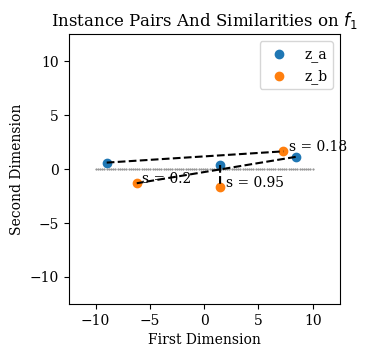

In [ ]:
manifold_name = 'f_1'

# Set up the raw manifold function
manifold_function = lambda S: gum.rotate(xs=S, ys=0*S, theta=0)

# Generate a dataset
reset_random_number_generators(seed=63) # Reproducability
noise_strength = 1.0
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration



The model is calibrated once on all data for exploration purposes and then cross-validated on five different train and test splits to assess its robustness. As can be seen from the below diagram, the mean loss converges quickly for the chosen signle stage model. During the cross-validation procedure, the data set is split into five disjoint test sets of equal size and their corresponding composite train sets. The model is re-initialized and trained for every fold. Loss trajectories are omitted here but can be obtained by setting the corresponding input argument for the cross_validate() function. Evaluation of the cross-validation on the test data is shown further down below.


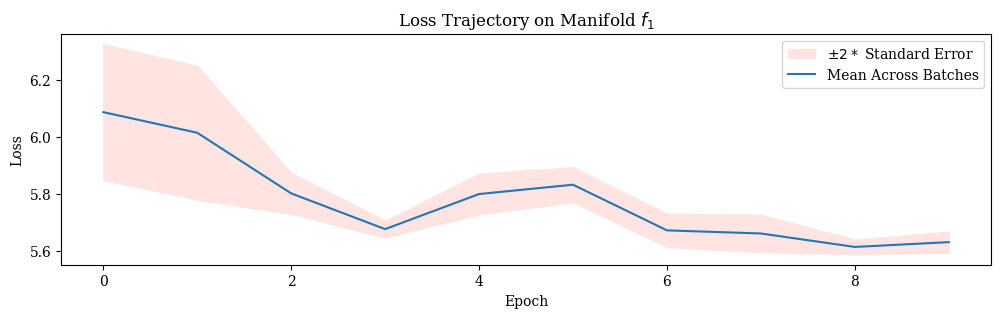

In [ ]:
# Create network
reset_random_number_generators(seed=247) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=1)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

# Calibrate network
batch_size = 256
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=10, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [ ]:
# Cross validate model behaviour
reset_random_number_generators(seed=620) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=1)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=256, epoch_count=10, similarity_function=similarity_function, manifold_name=manifold_name)

### Evaluation

The model achieves the goal of rotating space by $\pi/2$ radians such that the output represents position along the manifold on the vertical axis and residual variation along the horizontal axis. In the below diagram one can see the input to the model on the left hand side. It shows a scatter plot of the point cloud whereby manifold position is indicated by color. On the bottom and left flanks, one can see the marginal distributions. The horizontal distribution is uniform by construction of the manifold function. The vertical factor has a normal distribition since the noise added to the data was normally distributed. On the right hand side of the diagram one can see the model output. According to the scatter plot, manifold position now varies only vertically, instead of horizontally and the marginals are both reasonably normally distributed. This indicates that the calibration objective has been reached.

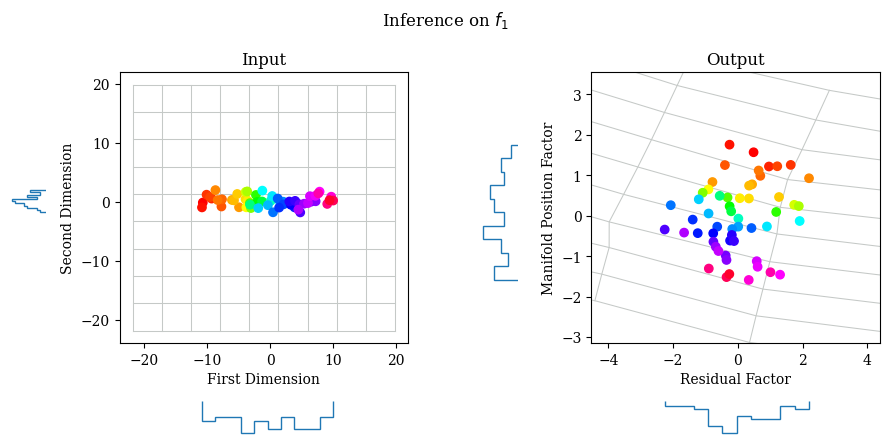

In [ ]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

The model's main effect is due to the activation normalization and reflection layers. The below diagram shows the transformation of the manifold function as it progresses through the different layers (left to right). These layers are activation normalization, reflection and coupling. The term "full coupling" means that two regular (i.e. semi-) coupling layers are combined with permutation layers to ensure all dimensions are coupled with each other. On the top of the diagram, one can see a bar chart that shows the $L_2$-norm of the difference between the layer input and output for an average sample. To better understand the nature of each layer, a first order Maclaurin series is fitted to the layer. The contribution of the affine term of that series is considered simple and reflected in the striped portion of each bar. The error of this series captures the higher order (i.e. non-linear) transformation and is shown in the dotted portion. The middle and bottom panels show the transformation on the manifold due to each of these two components. Data flows through this diagram in a zik-zak pattern, entering at the bottom of a column, up to the middle and down to the bottom of the right adjacent column.

On the one hand, one can see that the first activation normalization layer is used to reach the scale of a normal distribution. This effect acts only on the horizontal axis which has the main variation. This is a linear (location and scale) transformation and thus only the striped portion of the bar is visible. On the other hand, the reflection layer indeed aligns the horizontal axis of the input space with that of the output space. This is also a linear transformation. The coupling layer introduces a small dent in the manifold which might be there to reach the bell shape of the target normal distribution along the residual factor. Apart from that, the coupling layer and final activation normalization layer do not contribute in any noteworthy way to the model.

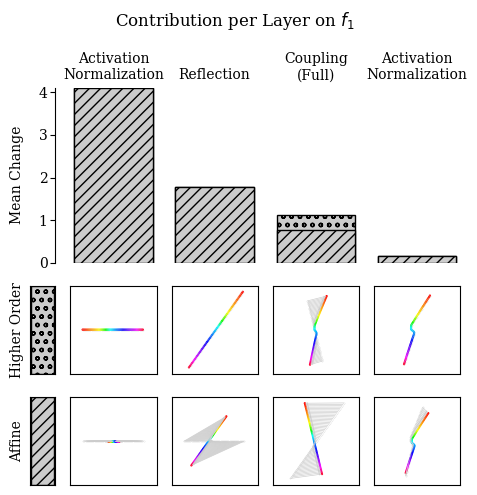

In [ ]:
# Plot layer-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[1,2,6,7], step_titles=['Activation\nNormalization','Reflection','Coupling\n(Full)','Activation\nNormalization'])

An important characteristic of flow models is that they are trivially invertible and this allows to convert changes in the output space to changes in the input space. The below applet shows how changing the slider along the position factor (vertical axis) of the output space results in changes along the manifold (horizontal input axis). Residual changes correspond to deviation away from the manifold. (Tip: The applet requires the model calibrated on this manifold to be in memory)

In [ ]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.5,1.5,0.1), residual=(-1.5,1.5,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=1.5, min=-1.5), FloatSlider(value=0.0…

This problem can be solved reliably by the chosen model as can be seen from the cross validation procedure. The below diagram shows for each of five folds (train-test splits) how predicted and actual manifold position relate. Each of the five suplots contains a scatter plot that shows the linearity of the association and a bar for the proportion $r^2$ of variance in the actual position that is explained by the predicted position. Since the association is linear and $r^2$ is close to $1.0$ for each fold, one can conclude that the model is robust across different samples.

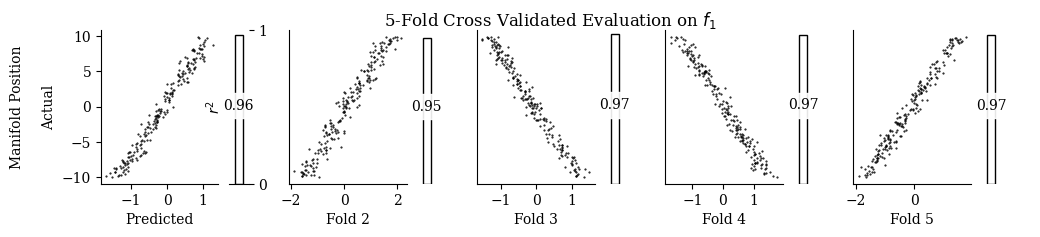

In [ ]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 2: Discontinuity

This case study examines to what extend the model can solve the manifold position problem in presence of a discontinuity. A manifold function was set up that splits $S$ in the middle and arranges the two halves as horizontal, partially overlapping straight lines. It was found that a 3 stage model can be calibrated reliably to provide the desired output distribution. When inspecting the layerwise contribution, one can see that the position and residual factors are disentangled at the end of the second stage. Although the third stage has proportionally the largest mean change from input to output, its main contribution is is scaling the factors to size. The cross-validation shows that the model reliably learns to disentangle the factors across partitions of the data.

### Data Synthesis

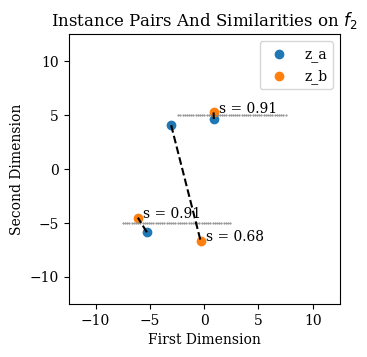

In [ ]:
# Set up the raw manifold function
manifold_name = 'f_2'
# Set up the raw manifold function
def manifold_function(S):
    half_1 = S[np.where(S <  0)]
    half_2 = S[np.where(0 <= S)]
    s_max = np.max(S)
    Z_1 = np.concatenate([half_1, half_2 - s_max/2]) + 1*s_max/4
    Z_2 = np.array([1*s_max/2]* len(half_1) + [3*s_max/2] * len(half_2)) - s_max

    return Z_1, Z_2

# Generate a dataset
reset_random_number_generators(seed=256) # Reproducability
noise_strength = 1
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)


### Model Calibration

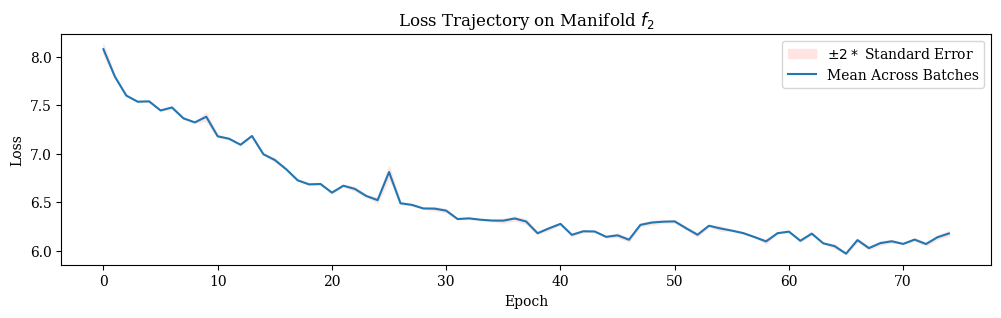

In [ ]:
# Create network
reset_random_number_generators(seed=273) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

# Calibrate network
batch_size = 512
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=75, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [ ]:
# Cross validate model behaviour
reset_random_number_generators(seed=620) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=512, epoch_count=75, similarity_function=similarity_function, manifold_name=manifold_name)

### Evaluation

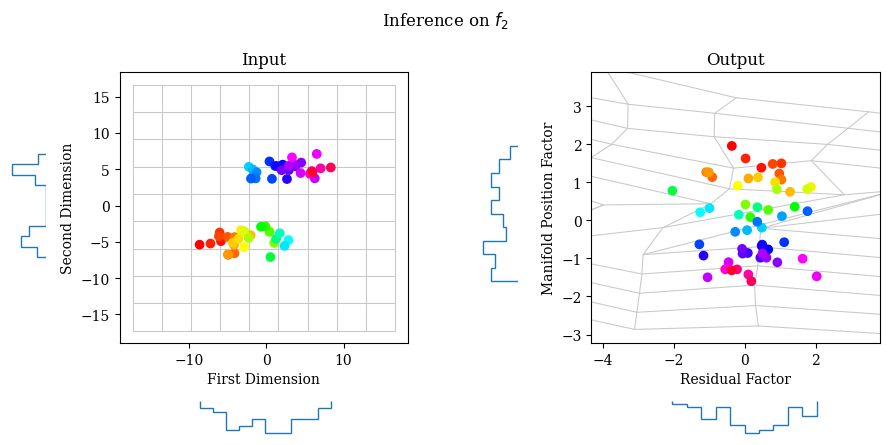

In [ ]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

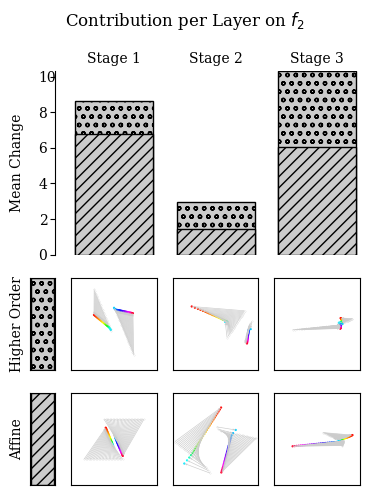

In [ ]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [ ]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.5,1.5,0.1), residual=(-1.5,1.5,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=1.5, min=-1.5), FloatSlider(value=0.0…

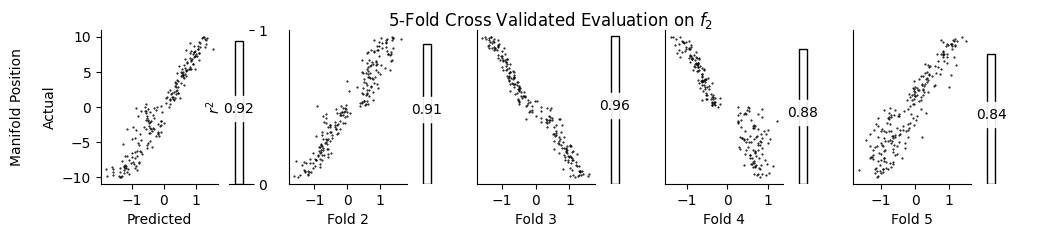

In [ ]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 3: Twist

In this case study the manifold is a horizontal line with a twist in the center. It was found that this problem can be solved with a 3 stage model. The layer-wise analysis shows that the higher order contribution of the first stage and the affine contribuiton of the second stage are opposing one another. This indicates that the model might be over-parameterized. Yet, according to the cross-validation analysis it reaches linear decomposition on every fold.

### Data Synthesis

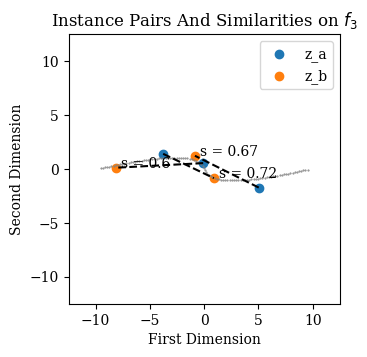

In [ ]:
# Set up the raw manifold function
manifold_name = 'f_3'
manifold_function = lambda S: gum.rotate(xs=np.arcsinh(S), ys=np.sign(np.arcsinh(S)) * np.cosh(np.arcsinh(S)) - np.sign(S), theta=1.2*np.pi/2.0)

# Generate a dataset
reset_random_number_generators(seed=503) # Reproducability
noise_strength = 0.3
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

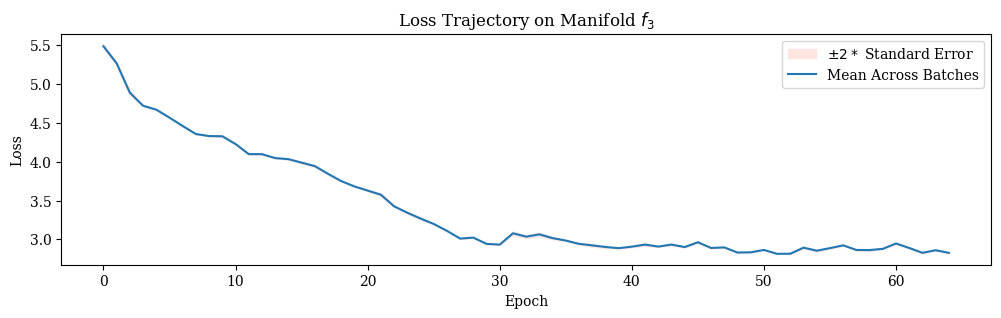

In [ ]:
# Create network
reset_random_number_generators(seed=227) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

# Calibrate network
batch_size = 512
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=65, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [ ]:
# Cross validate model behaviour
reset_random_number_generators(seed=620) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=512, epoch_count=75, similarity_function=similarity_function, manifold_name=manifold_name)

### Evaluation

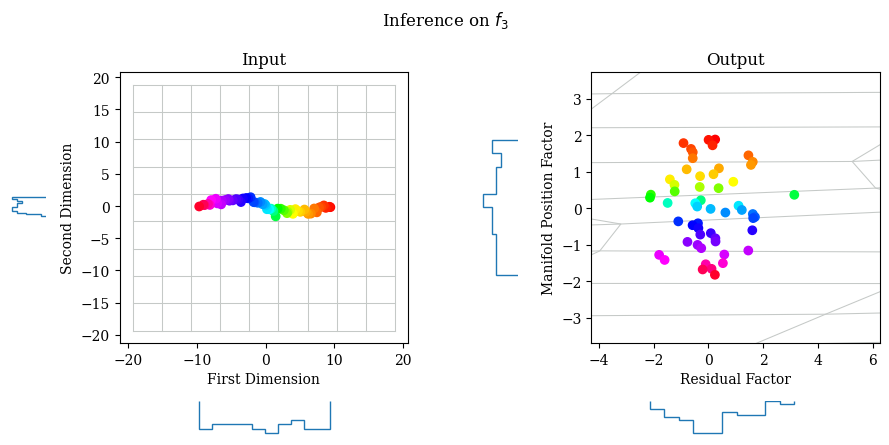

In [ ]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

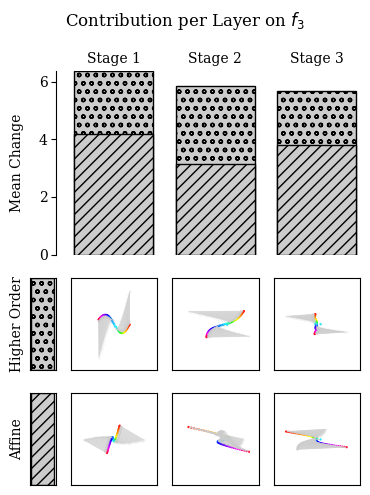

In [ ]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [ ]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.5,1.5,0.1), residual=(-1.5,1.5,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=1.5, min=-1.5), FloatSlider(value=0.0…

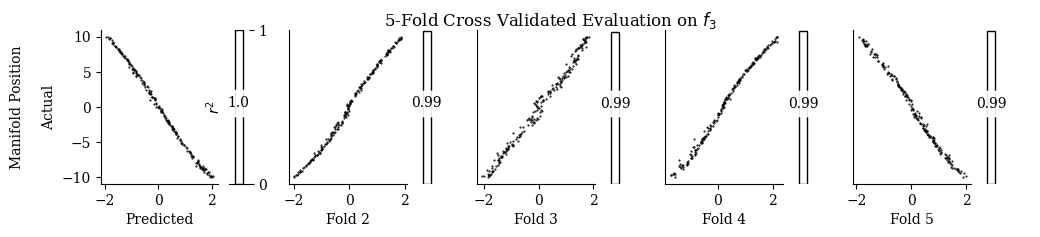

In [ ]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 4: Spiral

In this case study the advanced case of a spiral manifold is solved by the flow model under consideration. Similar to the other case studies, this one can be solved by a three stage model. As can be seen from the stage-wise decomposition, the majority of the disentanglement is completed at the end of the second stage and therafter the point-cloud is rescaled. The cross-validation analysis shows that the model reliably solves the task across the five partitions of the data.

### Data Synthesis

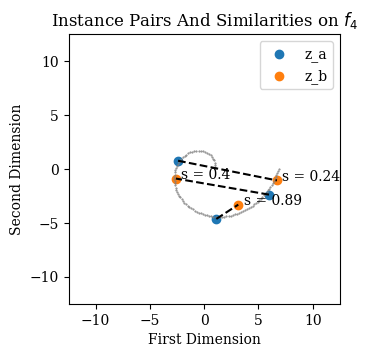

In [ ]:
# Set up the raw manifold function
manifold_name = 'f_4'
manifold_function = lambda S: gum.logarithmic_spiral(xs=np.log((S+s_max)/(1*np.sqrt(1+beta**2)/beta)+1)/beta, alpha=1, beta=beta) # https://www.quora.com/What-is-the-arc-length-of-the-logarithmic-spiral-from-t0-to-t

# Generate a dataset
reset_random_number_generators(seed=2) # Reproducability
noise_strength = 0.5
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

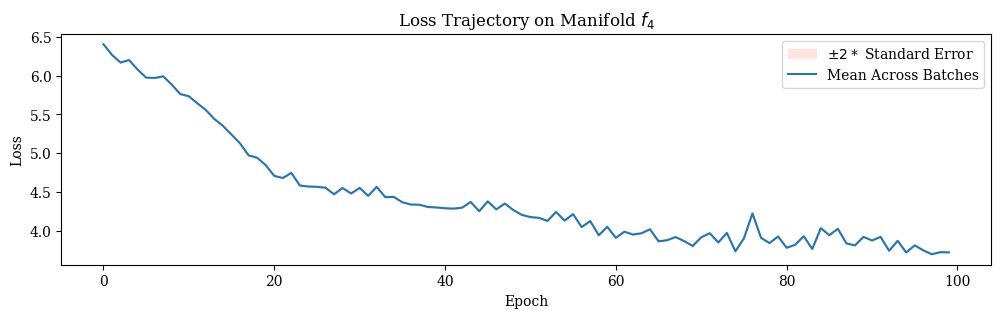

In [ ]:
# Create network
reset_random_number_generators(seed=869) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

# Calibrate network
batch_size = 1024
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=100, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [ ]:
# Cross validate model behaviour
reset_random_number_generators(seed=346) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=800, epoch_count=200, similarity_function=similarity_function, manifold_name=manifold_name)

### Evaluation

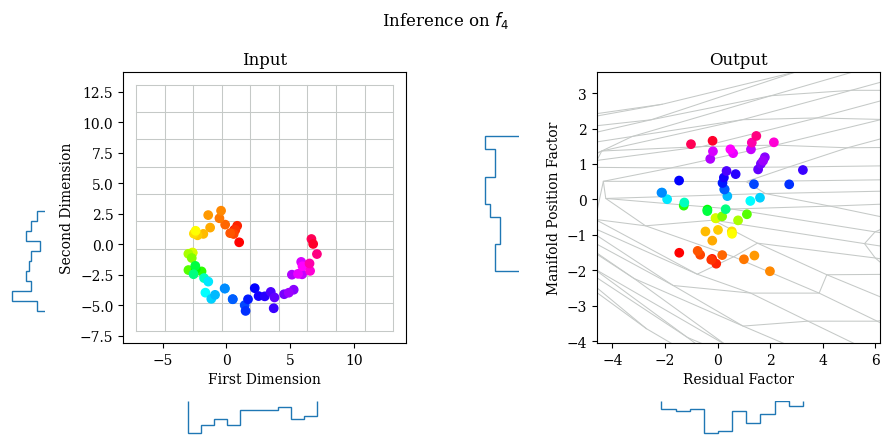

In [ ]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

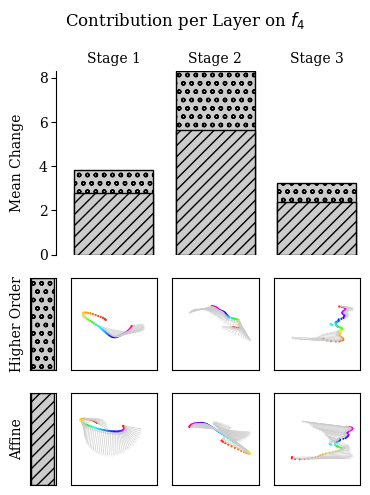

In [ ]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [ ]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.5,1.5,0.1), residual=(-1.5,1.5,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=1.5, min=-1.5), FloatSlider(value=0.0…

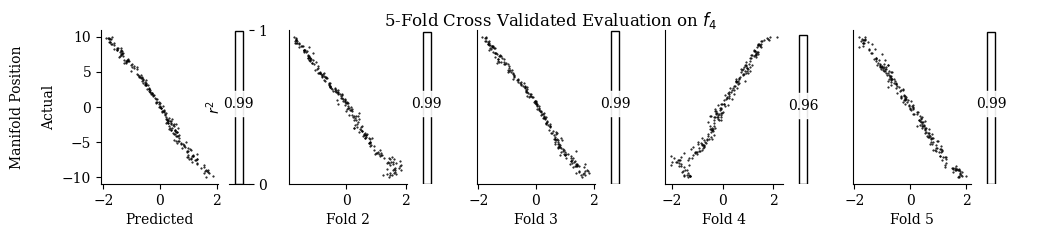

In [ ]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 5: Circle

In this case study the model is calibrated to straighten a circular manifold. This task is difficult because at the junction point of the circle (point (1,0)) there exist adjacent points that are supervised to be maximally distant. As can be seen from the layer-wise analysis, the circle is split already at the non-linear component of the first stage. Since the coupling layer is the only one capable of non-linear transformations it shows the importance of that layer. The position factor is disentangled from the residual factor by the end of the second layer and the third layer ensures proper scaling. The loss trajectory of this model remains spiky throughout the calibration. Furthermore, the cross-validation analysis shows that not all versions of the model manage to create a linear relationship between predicted and actual position. These observations hint at the complexity of this task.

### Data Synthesis

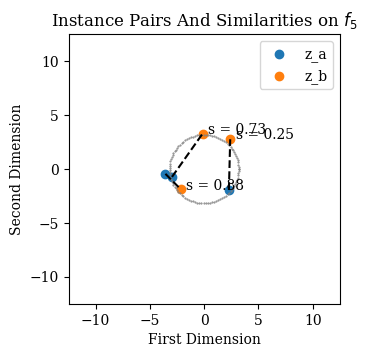

In [ ]:
# Set up the raw manifold function
manifold_name = 'f_5'
manifold_function = lambda S: ((2*s_max/(2*np.pi))*np.cos((S+s_max)*(2*np.pi)/(2*s_max)), (2*s_max/(2*np.pi))* np.sin((S+s_max)*(2*np.pi)/(2*s_max)))

# Generate a dataset
reset_random_number_generators(seed=934) # Reproducability
noise_strength = 0.5
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

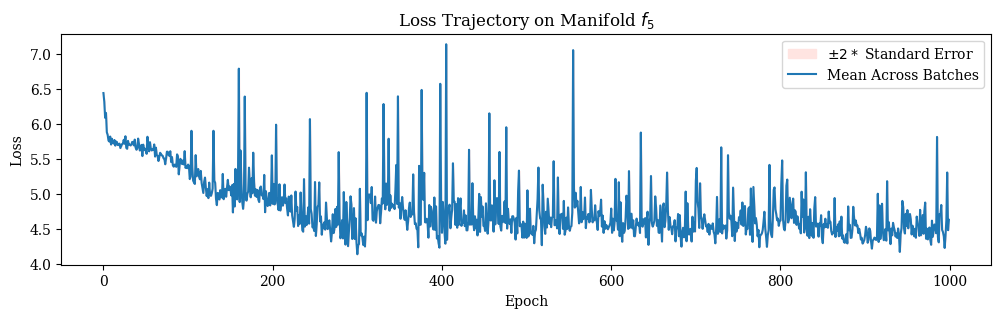

In [ ]:
# Create network
reset_random_number_generators(seed=286) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

# Calibrate network
batch_size = 1024
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=1000, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [44]:
# Cross validate model behaviour
reset_random_number_generators(seed=958) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=800, epoch_count=1000, similarity_function=similarity_function, manifold_name=manifold_name)

### Evaluation

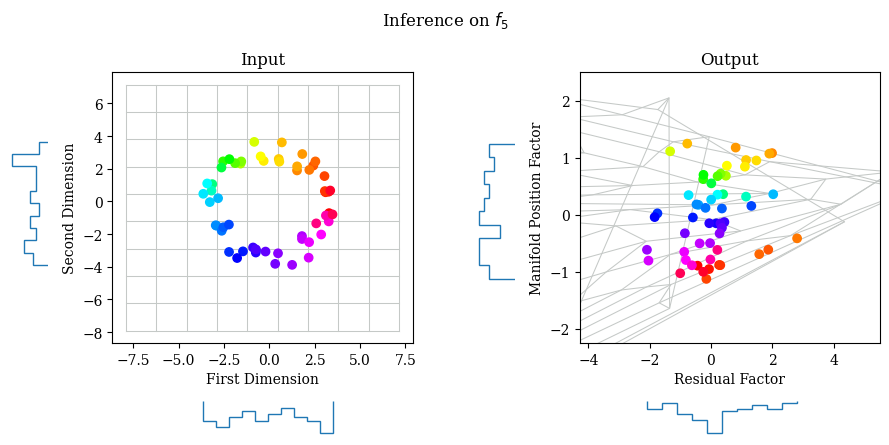

In [45]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

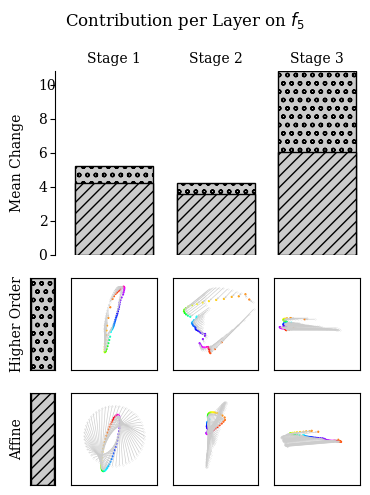

In [46]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [50]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.2,1.2,0.1), residual=(-1.5,1.5,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=-0.09999999999999987, description='position', max=1.2, min=-1.2), Floa…

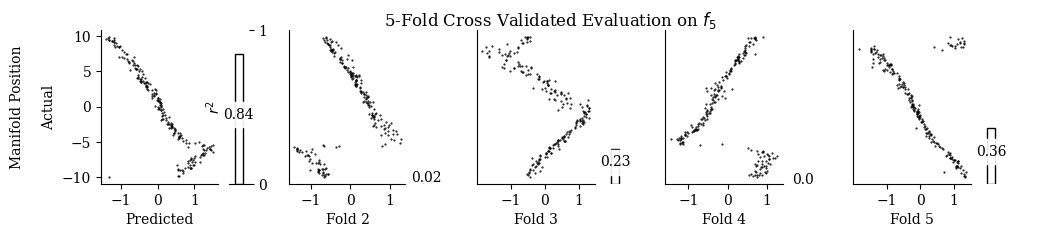

In [48]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 6: Dipole

In this case study the manifold takes the shape of two poles, i.e. dots which gives rise to a problem similar to classification. Points on the same pole are all maximally close while points on separate poles are maximally distant. As can be seen from the scatterplots, the model places all points from the right pole into the lower halfplane and all points from the left pole into the upper halfplane. The separation thus worked. When inspecting the layerwise contributions one can see that the linear and non-linear parts counteract each other to some extent. It is possible that a model with fewer layers would already suffice to solve the task. As she cross-validation results show, different initializations of the model lead to a working separation, thereby underlining the reliability of the model.

### Data Synthesis

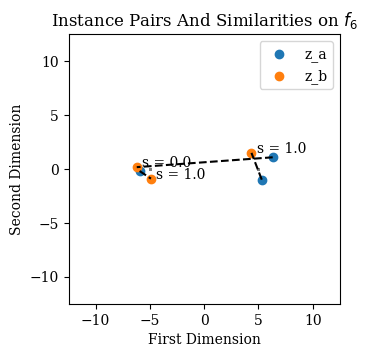

In [51]:
# Set up the raw manifold function
manifold_name = 'f_6'
manifold_function = lambda S: (5*(2*(0 < S) - 1), 0*S)

# Setup a custom similarity function
similarity_function_6 = lambda Y_a, Y_b: np.concatenate([np.zeros([len(Y_a),1]), (np.sign(Y_a[:,1]) == np.sign(Y_b[:,1]))[:,np.newaxis]], axis=1)

# Generate a dataset
reset_random_number_generators(seed=856) # Reproducability
noise_strength = 1
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function_6)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

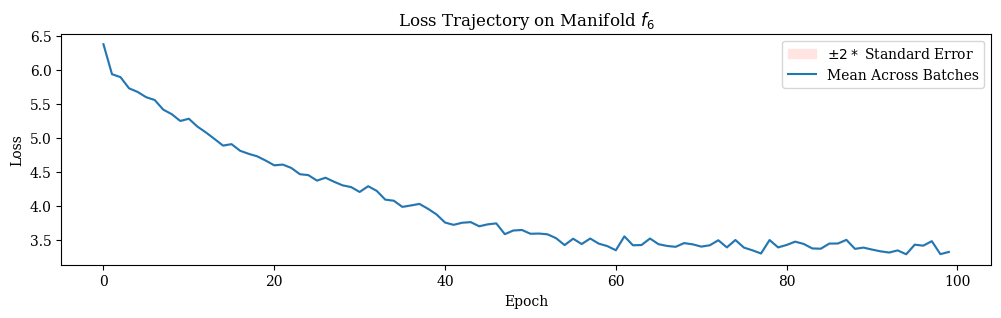

In [52]:
# Create network
reset_random_number_generators(seed=286) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3, sigma = 0.8)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

# Calibrate network
batch_size = 1024
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function_6)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=100, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [53]:
# Cross validate model behaviour
reset_random_number_generators(seed=958) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3, sigma = 0.8)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=512, epoch_count=100, similarity_function=similarity_function_6, manifold_name=manifold_name)

### Evaluation

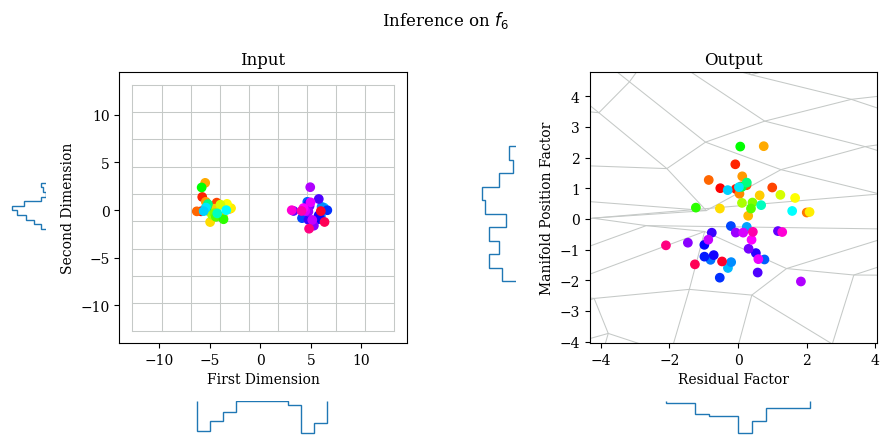

In [54]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

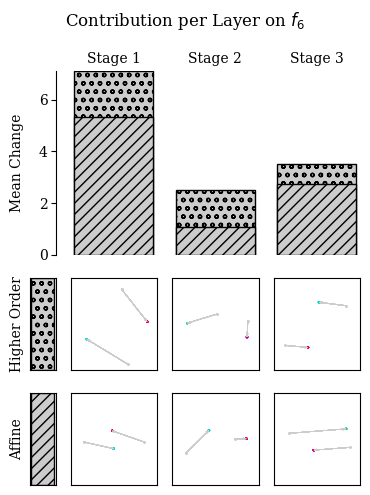

In [55]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [58]:
# Plot interactive tool
interact(plot_inverse_point, position=(-1.5,1.5,0.1), residual=(-2,2,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=1.5, min=-1.5), FloatSlider(value=0.0…

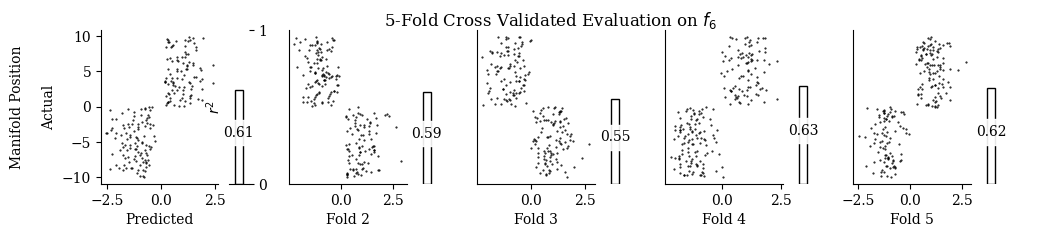

In [57]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 7: Quartet

This case study separates its manifold into four poles and thus constitutes an advancement of the dipole case study. It is more complex because the model has more freedom is arranging four poles along its position factor than two poles. The calibration trajectory converges, indicating the stability of the model. One can see in the scatter plots that the model manages to enumerate the four poles along the position axis. The layer-wise analysis shows that all 3 stages use linear and non-linear operations and the later stages still have a large contribution to the output. As can be seen from the cross-validation plots, not all model initializations create a clustered assocation of model input and output. This confirms the increased complexity compared to the dipole case.  

### Data Synthesis

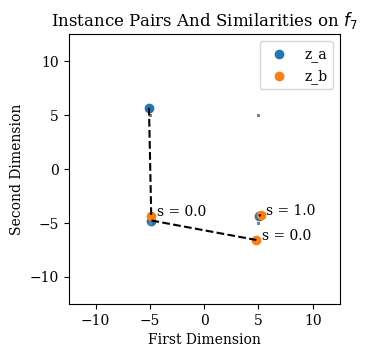

In [59]:
# Set up the raw manifold function
manifold_name = 'f_7'
def manifold_function(S):
    centroids = 5*np.array([[-1.0,1],[-1,-1],[1,1],[1,-1]])
    tmp = centroids[0] * (S[:,np.newaxis] < -s_max/2)
    tmp = tmp + centroids[1] * np.logical_and(-s_max/2 <= S, S < 0)[:,np.newaxis]
    tmp = tmp + centroids[2] * np.logical_and(0 <= S, S < s_max/2)[:,np.newaxis]
    tmp = tmp + centroids[3] * (s_max/2 <= S[:,np.newaxis])
    return (tmp[:,0], tmp[:,1])

# Setup a custom similarity function
def similarity_function_7(Y_a, Y_b):
    Y_a_classes = np.zeros(Y_a.shape)
    Y_a_classes[Y_a[:,1] < -s_max/2, 1] = 0
    Y_a_classes[np.logical_and(-s_max/2 <= Y_a[:,1], Y_a[:,1] < 0), 1] = 1
    Y_a_classes[np.logical_and(0 <= Y_a[:,1], Y_a[:,1] < s_max/2), 1] = 2
    Y_a_classes[s_max/2  <= Y_a[:,1], 1] = 3

    Y_b_classes = np.zeros(Y_b.shape)
    Y_b_classes[Y_b[:,1] < -s_max/2, 1] = 0
    Y_b_classes[np.logical_and(-s_max/2 <= Y_b[:,1], Y_b[:,1] < 0), 1] = 1
    Y_b_classes[np.logical_and(0 <= Y_b[:,1], Y_b[:,1] < s_max/2), 1] = 2
    Y_b_classes[s_max/2  <= Y_b[:,1], 1] = 3

    Y_ab = Y_a_classes
    Y_ab[:,1] = Y_a_classes[:,1] == Y_b_classes[:,1]

    return Y_ab

# Generate a dataset
reset_random_number_generators(seed=395) # Reproducability
noise_strength = 0.5
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function_7)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

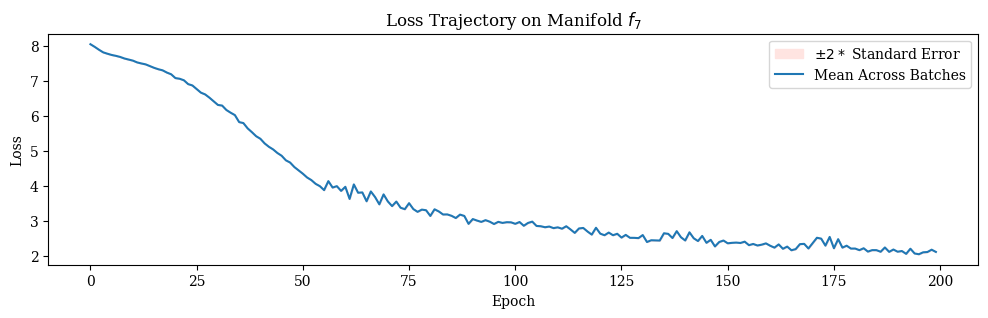

In [60]:
# Create network
reset_random_number_generators(seed=294) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3, sigma = 0.8)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

# Calibrate network
batch_size = 1024
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function_7)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=200, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [61]:
# Cross validate model behaviour
reset_random_number_generators(seed=958) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=3, sigma=0.8)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=512, epoch_count=200, similarity_function=similarity_function_7, manifold_name=manifold_name)

### Evaluation

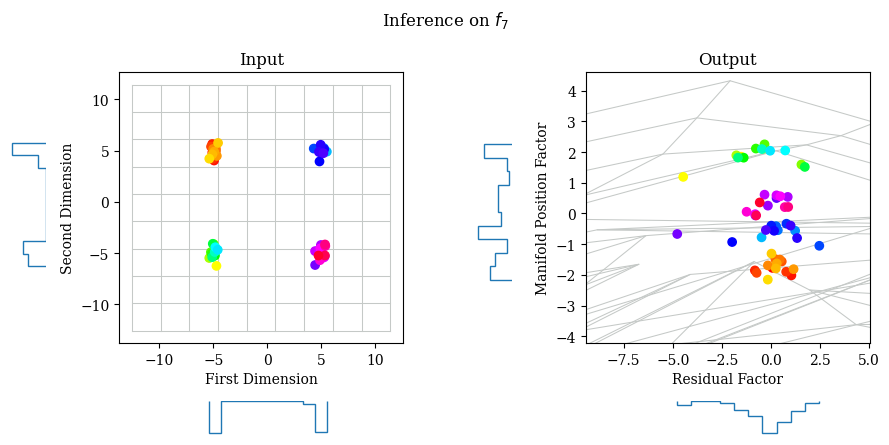

In [62]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

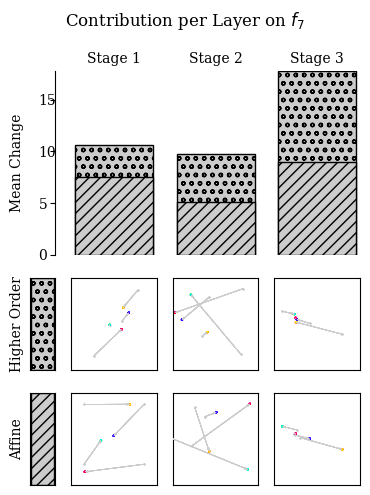

In [63]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21], step_titles=['Stage 1','Stage 2','Stage 3'])

In [64]:
# Plot interactive tool
interact(plot_inverse_point, position=(-2,2,0.1), residual=(-2,2,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=2.0, min=-2.0), FloatSlider(value=0.0…

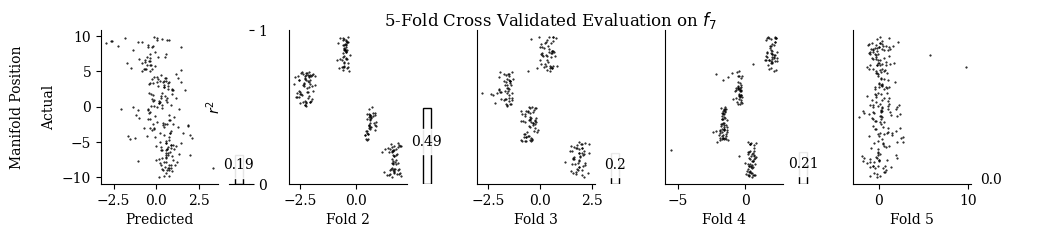

In [65]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Case Study 8: Flip Flop

In this case study the manifold takes the shape of two intermingling flaps. The position along the manifold is either on the left flap or on the right flap (thus no distinction for position along a flap). It therefore combines the discontinuity, curvature and category properties of earlier case studies. The model does converge throughout calibration. As can be seen from the scatterplots, the disentanglement aligns the left flap with the top halfplane and the right flap with the bottom half plane. Although not explicitly supervised to do so, it preserves proximities of data points. This is likely due to the fact that the data points were arranged along the flap in the input space and permuting them would require a more complicated mapping than necessary. The first three stages of the model are mostly responsible for the non-linear transformations while the last two stages are responsible for rotation and scaling, indicating that a smaller model might also work. Lastly, the cross-validation results show that different initializations of the model all lead to a reliable separation of the flaps.

### Data Synthesis

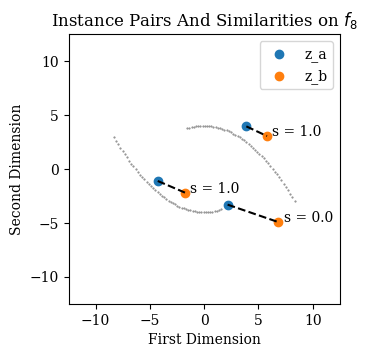

In [66]:
# Set up the raw manifold function
manifold_name = 'f_8'
def manifold_function(S):
    tmp = np.zeros([len(S),2])
    tmp[S<0,0] = S[S<0] + s_max/6
    tmp[0<=S,0] = S[0<=S] - s_max/6
    tmp[S<0,1] = tmp[S<0,0] **2/10 -4
    tmp[0<=S,1] = -tmp[0<=S,0] ** 2/10 + 4

    return (tmp[:,0], tmp[:,1])

# Setup a custom similarity function
similarity_function_8 = lambda Y_a, Y_b: np.concatenate([np.zeros([len(Y_a),1]), (np.sign(Y_a[:,1]) == np.sign(Y_b[:,1]))[:,np.newaxis]], axis=1)

# Generate a dataset
reset_random_number_generators(seed=395) # Reproducability
noise_strength = 1
Z, Y = create_data_set(S=S, manifold_function=manifold_function, noise_strength=noise_strength) # Z.shape == [M, N], Y.shape = [M, F]

# Plot pairs of instances
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=32, similarity_function=similarity_function_8)
Z_ab, Y_ab = next(iterator)

plot_instance_pairs(S=S_star, Z_ab=Z_ab[:3,:,:], Y_ab=Y_ab[:3,:], manifold_function=manifold_function, manifold_name=manifold_name)

### Model Calibration

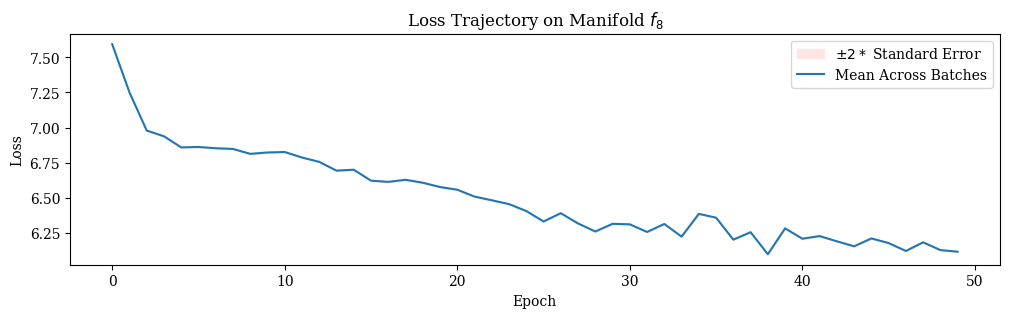

In [67]:
# Create network
reset_random_number_generators(seed=294) # Reproducability
network = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=5, sigma = 0.8)
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

# Calibrate network
batch_size = 1024
iterator = mdis.volatile_factorized_pair_iterator(X=Z, Y=Y, batch_size=batch_size, similarity_function=similarity_function_8)
epoch_loss_means, epoch_loss_standard_deviations = network.fit(iterator=iterator, epoch_count=50, batch_count=M//batch_size)
plot_loss_trajectory(epoch_loss_means=epoch_loss_means, epoch_loss_standard_deviations=epoch_loss_standard_deviations, manifold_name=manifold_name)

In [68]:
# Cross validate model behaviour
reset_random_number_generators(seed=958) # Reproducability
networks = [None] * 5 # Fold-count many networks
for i in range(len(networks)):
    networks[i] = create_network(Z_sample=Z[np.random.choice(M, size=128)], stage_count=5, sigma = 0.8)
    networks[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
Z_test, Y_test = cross_validate(Z=Z, Y=Y, networks=networks, batch_size=512, epoch_count=50, similarity_function=similarity_function_8, manifold_name=manifold_name)

### Evaluation

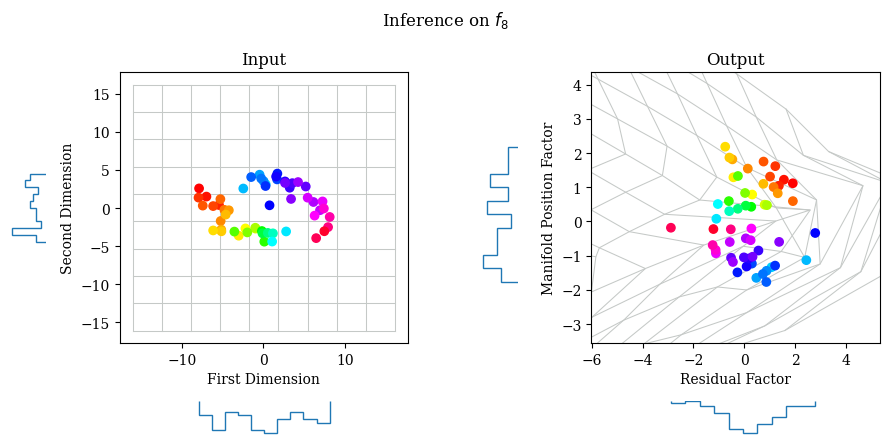

In [69]:
# Plot input and output
plot_input_output(network, S_range = [np.min(S), np.max(S)], manifold_function=manifold_function, noise_strength=noise_strength, manifold_name=manifold_name);

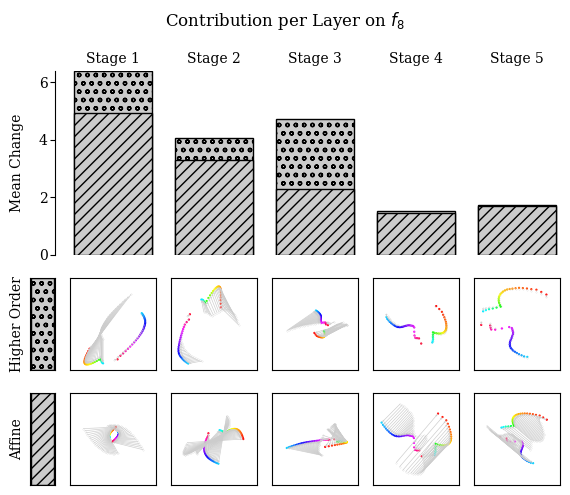

In [70]:
# Plot stage-wise contribution
plot_contribution_per_layer(network=network, s_range=(np.min(S), np.max(S)), manifold_function=manifold_function, manifold_name=manifold_name, layer_steps=[7,14,21,28,35], step_titles=['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5'])

In [71]:
# Plot interactive tool
interact(plot_inverse_point, position=(-2,2,0.1), residual=(-2,2,0.1), S=fixed(S_star), network=fixed(network), manifold_function=fixed(manifold_function), manifold_name=fixed(manifold_name));

interactive(children=(FloatSlider(value=0.0, description='position', max=2.0, min=-2.0), FloatSlider(value=0.0…

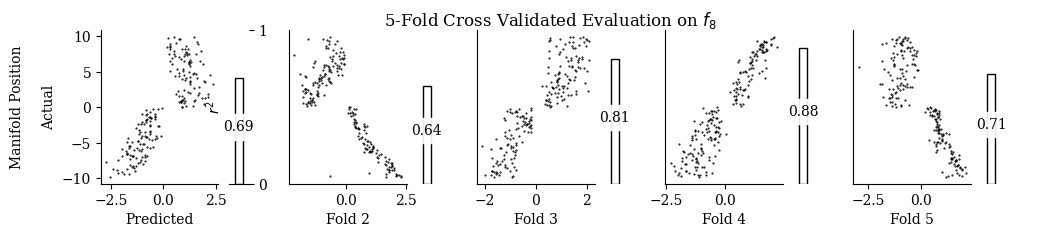

In [72]:
# Plot cross validation
evaluate_and_plot_networks(Z_test=Z_test, Y_test=Y_test, networks=networks, manifold_name=manifold_name);

## Conclusion

In this notebook, several case studies were constructed to examine the suitability of flow models for factor disentanglement in low dimensional manifolds. It was found that the chosen model can solve rotations, discontinuities, twists, spirals, circles and categorical organization. It was also found that the models makes use of affine as well as higher order transformations, suggesting that all layer types are useful. During experimentation it was found that model size matters for performance. The majority of case studies yielded reliable solutions across partitions of their data sets. In a nutshell one may conclude that the model is versatile for solving the low-dimensional manifold position problem. It remains to be investigated how this potential translates to higher dimensional spaces.